## Cosine Similarity Calculations
Cosine similarity is a measure of similarity between two non-zero vectors of an inner product space that measures the cosine of the angle between them. Similarity measures have a multiude of uses in machine learning projects; they come in handy when matching strings, measuring distance, and extracting features. This similarity measurement is particularly concerned with orientation, rather than magnitude. 
In this case study, you'll use the cosine similarity to compare both a numeric data within a plane and a text dataset for string matching.

Load the Python modules, including cosine_similarity, from sklearn.metrics.pairwise

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline
plt.style.use('ggplot')
from scipy import spatial
from sklearn.metrics.pairwise import cosine_similarity

**<font color='teal'> Load the distance dataset into a dataframe. </font>**

In [2]:
df = pd.read_csv(r'C:\Users\Ni Qie\Desktop\springboard\assgin\1585686145_CosineSimilarityCaseStudy\CosineSimilarityCaseStudy\distance_dataset.csv')

### Cosine Similarity with clusters and numeric matrices

All points in our dataset can be thought of as feature vectors. We illustrate it here as we display the __Cosine Similarity__ between each feature vector in the YZ plane and the [5, 5] vector we chose as reference. The sklearn.metrics.pairwise module provides an efficient way to compute the __cosine_similarity__ for large arrays from which we can compute the similarity.

 **<font color='teal'> First, create a 2D and a 3D matrix from the dataframe. The 2D matrix should contain the 'Y' and 'Z' columns and the 3D matrix should contain the 'X','Y', and 'Z' columns.</font>**

In [3]:
matYZ = df[['Y','Z']]
mat = df[['X','Y','Z']]

Calculate the cosine similarity for those matrices with reference planes of 5,5 and 5,5,5. Then subtract those measures from 1 in new features.

In [4]:
# For 3D matrix
simCosine3D = 1. - cosine_similarity(mat, [[5, 5, 5]], dense_output=True)

# For 2D matrix
simCosine = 1. - cosine_similarity(matYZ, [[5, 5]], dense_output=True)

Using the 2D matrix and the reference plane of (5,5) we can use a scatter plot to view the way the similarity is calculated using the Cosine angle.

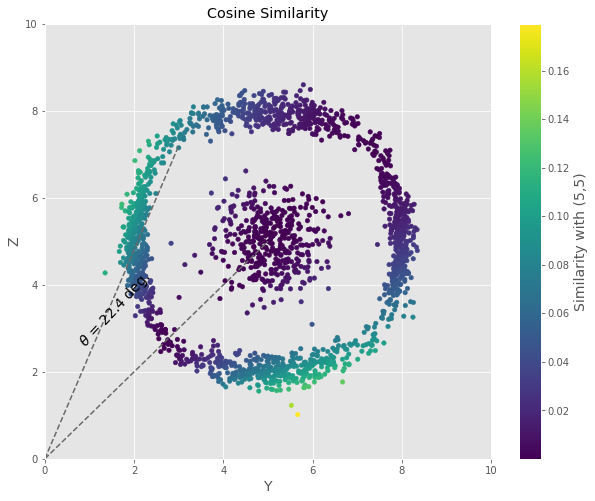

In [5]:
figCosine = plt.figure(figsize=[10,8])

plt.scatter(df.Y, df.Z, c=simCosine[:,0], s=20)
plt.plot([0,5],[0,5], '--', color='dimgray')
plt.plot([0,3],[0,7.2], '--', color='dimgray')
plt.text(0.7,2.6,r'$\theta$ = 22.4 deg.', rotation=47, size=14)
plt.ylim([0,10])
plt.xlim([0,10])
plt.xlabel('Y', size=14)
plt.ylabel('Z', size=14)
plt.title('Cosine Similarity')
cb = plt.colorbar()
cb.set_label('Similarity with (5,5)', size=14)

#figCosine.savefig('similarity-cosine.png')

Now, plot the 3D matrix with the similarity and the reference plane, (5,5,5).

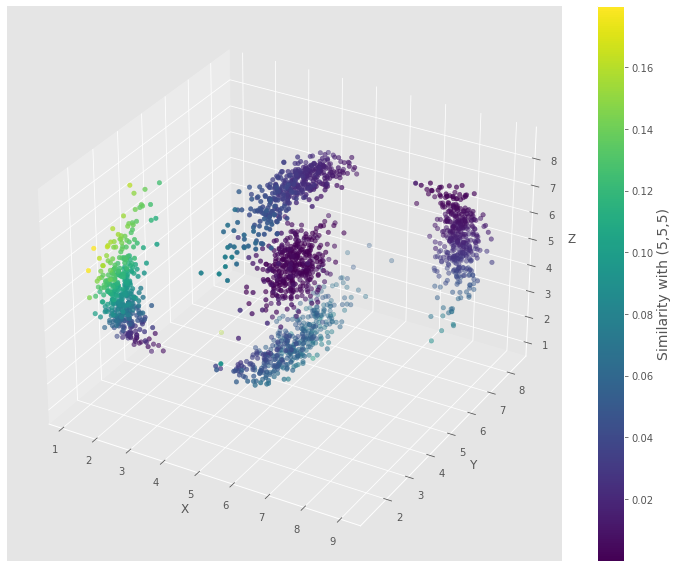

In [6]:
from mpl_toolkits.mplot3d import Axes3D

figCosine3D = plt.figure(figsize=(10, 8))
ax = figCosine3D.add_subplot(111, projection='3d')

p = ax.scatter(mat['X'], mat['Y'], mat['Z'], c=simCosine3D[:, 0])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
cb = figCosine3D.colorbar(p)
cb.set_label('Similarity with (5,5,5)', size=14)
                                   
figCosine3D.tight_layout()
#figCosine3D.savefig('cosine-3D.png', dpi=300, transparent=True)

----

### Cosine Similarity with text data
This is a quick example of how you can use Cosine Similarity to compare different text values or names for record matching or other natural language proecessing needs. 
First, we use count vectorizer to create a vector for each unique word in our Document 0 and Document 1. 

In [14]:
from sklearn.feature_extraction.text import CountVectorizer

Document1 = "Starbucks Coffee"
Document2 = "Essence of Coffee"
corpus = [Document1,Document2]

count_vect = CountVectorizer()

X_train_counts = count_vect.fit_transform(corpus)

# Retrieve feature names from CountVectorizer
feature_names = count_vect.get_feature_names_out()

# Create DataFrame using the feature names and document indices
pd.DataFrame(X_train_counts.toarray(), columns=feature_names, index=['Document 0', 'Document 1'])


,coffee,essence,of,starbucks
Document 0,1,0,0,1
Document 1,1,1,1,0


Now, we use a common frequency tool called TF-IDF to convert the vectors to unique measures.

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
trsfm=vectorizer.fit_transform(corpus)
feature_names = vectorizer.get_feature_names_out()
pd.DataFrame(trsfm.toarray(),columns=feature_names,index=['Document 0','Document 1'])

,coffee,essence,of,starbucks
Document 0,0.579739,0.000000,0.000000,0.814802
Document 1,0.449436,0.631667,0.631667,0.000000


Here, we finally apply the __Cosine Similarity__ measure to calculate how similar Document 0 is compared to any other document in the corpus. Therefore, the first value of 1 is showing that the Document 0 is 100% similar to Document 0 and 0.26055576 is the similarity measure between Document 0 and Document 1.

In [16]:
cosine_similarity(trsfm[0:1], trsfm)

array([[1.        , 0.26055567]])

Replace the current values for `Document 0` and `Document 1` with your own sentence or paragraph and apply the same steps as we did in the above example.

 **<font color='teal'> Combine the documents into a corpus.</font>**

In [17]:
Document1 = """According to all known laws of aviation, 
there is no way a bee should be able to fly. 
Its wings are too small to get its fat little body off the ground. 
The bee, of course, flies anyway because 
bees don't care what humans think is impossible."""

Document2 = """Bees are flying insects closely related to wasps and ants, 
known for their role in pollination and, in the case of the best-known 
bee species, the western honey bee, for producing honey. 
Bees are a monophyletic lineage within the superfamily 
Apoidea. They are presently considered a clade, called 
Anthophila. There are over 16,000 known species of bees in seven 
recognized biological families.[1][2] Some species – 
including honey bees, bumblebees, and stingless bees – 
live socially in colonies while some species – including mason bees, 
carpenter bees, leafcutter bees, and sweat bees – are solitary."""

 **<font color='teal'> Apply the count vectorizer to the corpus to transform it into vectors.</font>**

In [19]:
corpus = [Document1,Document2]
X_train_counts = count_vect.fit_transform(corpus)

 **<font color='teal'> Convert the vector counts to a dataframe with Pandas.</font>**

In [20]:
feature_names = count_vect.get_feature_names_out()
pd.DataFrame(X_train_counts.toarray(), columns=feature_names, index=['Document 0', 'Document 1'])

,000,16,able,according,all,and,anthophila,ants,anyway,apoidea,...,think,to,too,wasps,way,western,what,while,wings,within
Document 0,0,0,1,1,1,0,0,0,1,0,...,1,3,1,0,1,0,1,0,1,0
Document 1,1,1,0,0,0,4,1,1,0,1,...,0,1,0,1,0,1,0,1,0,1


 **<font color='teal'> Apply TF-IDF to convert the vectors to unique frequency measures.</font>**

In [21]:
trsfm=vectorizer.fit_transform(corpus)
pd.DataFrame(trsfm.toarray(),columns=feature_names,index=['Document 0','Document 1'])

,000,16,able,according,all,and,anthophila,ants,anyway,apoidea,...,think,to,too,wasps,way,western,what,while,wings,within
Document 0,0.000000,0.000000,0.14191,0.14191,0.14191,0.00000,0.000000,0.000000,0.14191,0.000000,...,0.14191,0.302911,0.14191,0.000000,0.14191,0.000000,0.14191,0.000000,0.14191,0.000000
Document 1,0.074048,0.074048,0.00000,0.00000,0.00000,0.29619,0.074048,0.074048,0.00000,0.074048,...,0.00000,0.052685,0.00000,0.074048,0.00000,0.074048,0.00000,0.074048,0.00000,0.074048


 **<font color='teal'> Use the cosine similarity function to get measures of similarity for the sentences or paragraphs in your original document.</font>**

In [22]:
cosine_similarity(trsfm[0:1], trsfm)

array([[1.        , 0.19682769]])